## Optymalizacja i propagacja wsteczna (backprop)

Zaczniemy od prostego przykładu. Funkcji kwadratowej: $f(x) = x^2$

Spróbujemy ją zoptymalizować (znaleźć minimum) przy pomocy metody zwanej _gradient descent_. Polega ona na wykorzystaniu gradientu (wartości pierwszej pochodnej) przy wykonywaniu kroku optymalizacji.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

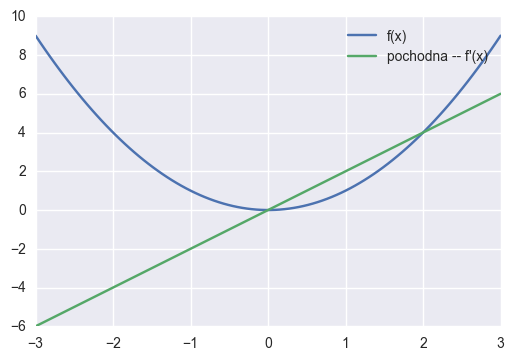

In [2]:
x = np.linspace(-3, 3, 100)
plt.plot(x, x**2, label='f(x)')  # optymalizowana funkcja
plt.plot(x, 2 * x, label='pochodna -- f\'(x)')  # pochodna
plt.legend()
plt.show()

Funkcja ta ma swoje minimum w punkcie $x = 0$. Jak widać na powyższym rysunku, gdy pochodna jest dodatnia (co oznacza, że funkcja jest rosnąca) lub gdy pochodna jest ujemna (gdy funkcja jest malejąca), żeby zminimalizować wartość funkcji potrzebujemy wykonywać krok optymalizacji w kierunku **przeciwnym** do tego wyznaczanego przez gradient.

Przykładowo gdybyśmy byli w punkcie $x = 2$, gradient wynosiłby $4$. Ponieważ jest dodatni, żeby zbliżyć się do minimum potrzebujemy przesunąć naszą pozycje w kierunku przeciwnym czyli w stonę ujemną.

Ponieważ gradient nie mówi nam dokładnie jaki krok powinniśmy wykonać, żeby dotrzeć do minimum a raczej wskazuje kierunek. Żeby nie "przeskoczyć" minimum zwykle skaluje się krok o pewną wartość $\alpha$ nazywaną _krokiem uczenia_ (ang. learning rate).

#### Prosty przykład optymalizacji $f(x) = x^2$ przy użyciu gradient descent.

Sprawdź różne wartości `learning_step`, w szczególności `[0.1, 1.0, 1.1]`.

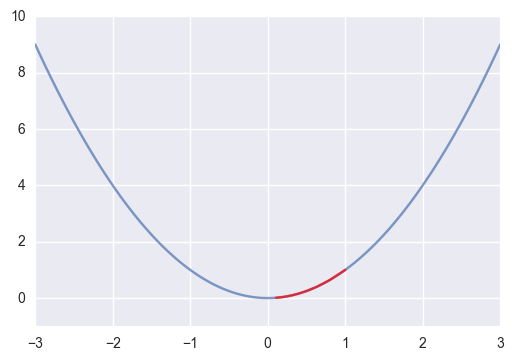

In [3]:
learning_rate = 0.1  # przykładowa wartość
nb_steps = 10
x_ = 1

steps = [x_]
for _ in range(nb_steps):
    x_ -= learning_rate * (2 * x_)  # learning_rate * pochodna
    steps += [x_]
    
plt.plot(x, x**2, alpha=0.7)
plt.plot(steps, np.array(steps)**2, 'r-', alpha=0.7)
plt.xlim(-3, 3)
plt.ylim(-1, 10)
plt.show()

## Backprop - propagacja wsteczna - metoda liczenia gradientów przy pomocy _reguły łańcuchowej_ (ang. chain rule)

Rozpatrzymy przykład minimalizacji troche bardziej skomplikowanej jednowymiarowej funkcji
$$f(x) = \frac{x \cdot \sigma(x)}{x^2 + 1}$$

Do optymalizacji potrzebujemy gradientu funkcji. Do jego wyliczenia skorzystamy z _chain rule_ oraz grafu obliczeniowego.

Chain rule mówi, że:
$$ \frac{\partial f}{\partial x} = \frac{\partial f}{\partial y} \cdot \frac{\partial y}{\partial x}$$

Żeby łatwiej zastosować _chain rule_ stworzymy z funkcji _graf obliczeniowy_, którego wykonanie zwróci nam wynik funkcji.

![Graf obliczeniowy](img/comp-graph.png "Graf obliczeniowy")

In [4]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [5]:
def forward_pass(x):
    t1 = sigmoid(x)  # 1
    t2 = t1 * x      # 2
    
    b1 = x**2        # 3
    b2 = b1 + 1.     # 4
    b3 = 1. / b2     # 5
    
    y = t2 * b3      # 6
    return y

![Backprop w grafie](img/backprop-comp-graph.png "Graf obliczeniowy")

Jeśli do węzła przychodzi więcej niż jedna krawędź (np. węzeł _x_), gradienty sumujemy.

In [6]:
def backward_pass(x):
    # kopia z forward_pass, ponieważ potrzebujemy wartości
    # pośrednich by wyliczyć pochodne
    # >>>
    t1 = sigmoid(x)  # 1
    t2 = t1 * x      # 2
    
    b1 = x**2        # 3
    b2 = b1 + 1.     # 4
    b3 = 1. / b2     # 5
    
    y = t2 * b3      # 6
    # <<<
    
    # backprop: y = t2 * b3
    dt2 = b3                    # 6
    db3 = t2                    # 6
    
    # backprop: b3 = 1. / b2
    db2 = (-1. / b2**2) * db3   # 5
    
    # backprop: b2 = b1 + 1.
    db1 = 1. * db2              # 4
    
    # backprop: b1 = x**2
    dx = 2 * x * db1            # 3
    
    # backprop: t2 = t1 * x
    dt1 = x * dt2               # 2
    dx += t1 * dt2              # 2 -- uwaga! pochodna dx zależy od kilku węzłów dlatego sumujemy jej gradienty
    
    # backprop: t1 = sigmoid(x)
    dx += t1 * (1. - t1) * dt1  # 1
    
    return dx

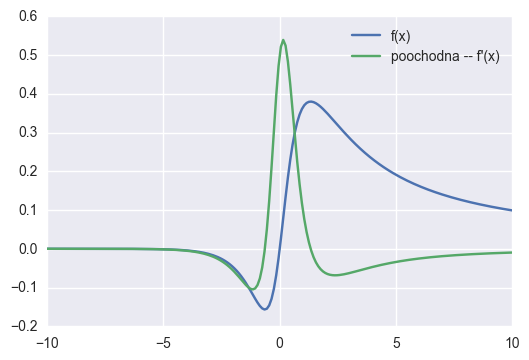

In [7]:
x = np.linspace(-10, 10, 200)

plt.plot(x, forward_pass(x), label='f(x)')
plt.plot(x, backward_pass(x), label='poochodna -- f\'(x)')
plt.legend()
plt.show()

Posiadając gradient możemy próbować optymalizować funkcję, podobnie jak poprzenio.

Sprawdź różne wartości parametru `x_`, który oznacza punkt startowy optymalizacji. W szczególności zwróć uwagę na wartości `[-5.0, 1.3306, 1.3307, 1.330696146306314]`.

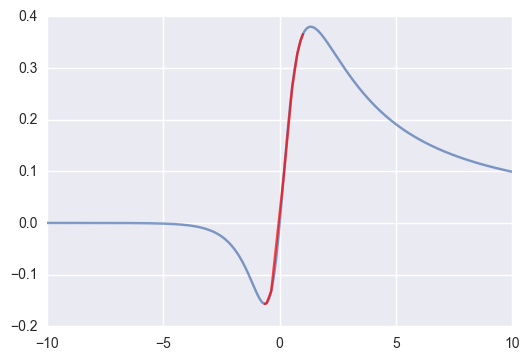

In [8]:
learning_rate = 1
nb_steps = 100
x_ = 1.  # przykładowa wartość

steps = [x_]
for _ in range(nb_steps):
    x_ -= learning_rate * backward_pass(x_)
    steps += [x_]

plt.plot(x, forward_pass(x), alpha=0.7)
plt.plot(steps, forward_pass(np.array(steps)), 'r-', alpha=0.7)
plt.show()

Jakie pojawiają się problemy?